In [ ]:
from google.colab import files
uploaded = files.upload()   # choose titanic.zip when prompted


Saving titanic.zip to titanic.zip


Observation:

*   Uses Google Colab's files.upload() to open a file selection dialog in the notebook environment.
*   Allows the user to manually upload the dataset (titanic.zip).

In [2]:
import zipfile, glob, os

# Adjust filename if different
zip_name = "titanic.zip"

# Extract
with zipfile.ZipFile(zip_name, 'r') as z:
    z.extractall('data')
print("Extracted to /content/data")

# Find CSV files inside data (or root)
csvs = glob.glob('data/**/*.csv', recursive=True) + glob.glob('data/*.csv') + glob.glob('*.csv')
print("CSV files found:", csvs)


Extracted to /content/data
CSV files found: ['data/train.csv', 'data/gender_submission.csv', 'data/test.csv', 'data/train.csv', 'data/gender_submission.csv', 'data/test.csv']


Observation:







*   Imports libraries for working with zip files (zipfile), file searching (glob), and OS operations (os).
*   Extracts titanic.zip into the data directory.
*   Searches for CSV files inside the extracted folders and lists them.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# load the Titanic CSV
csv_path = 'data/train.csv'  # <-- replace with your actual CSV file path
df = pd.read_csv(csv_path)

# quick look
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Observation:

*   Imports Pandas for data handling, Matplotlib and Seaborn for visualization.
*   Sets Seaborn’s theme for cleaner plots.

In [7]:
# shape, columns
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# types and non-null counts
df.info()

# descriptive stats
df.describe(include='all').T

# missing values
df.isnull().sum().sort_values(ascending=False)


Shape: (891, 12)
Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


Observation:

*   Displays dataset dimensions and column names.
*   Shows data types and missing values per column.







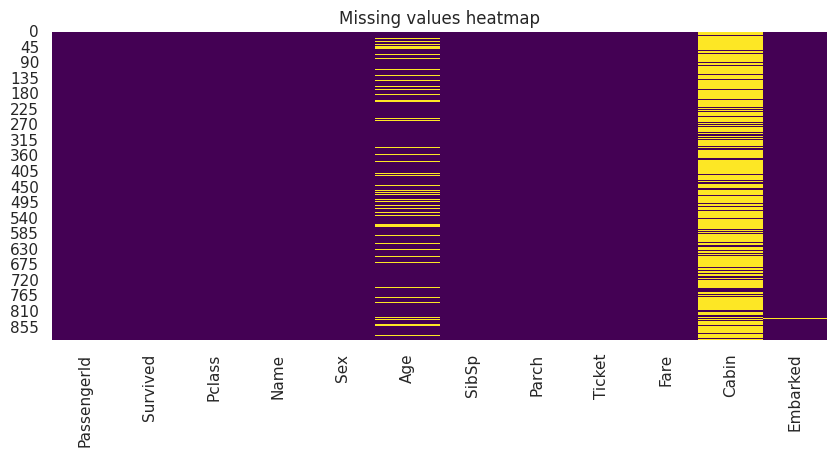

In [8]:
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing values heatmap')
plt.show()

Observation:

*   Creates a heatmap to visualize missing data.
*   Helps identify columns with many NaN values.

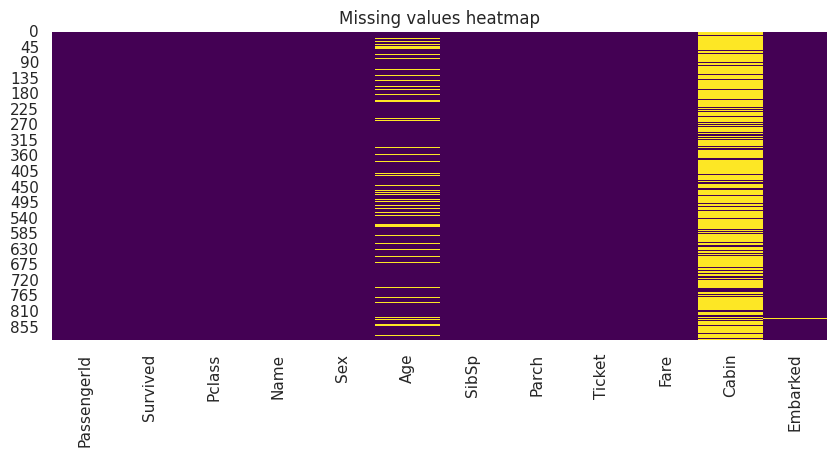

In [9]:
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing values heatmap')
plt.show()


Observation:

*   Repeats the missing values heatmap creation.
*   Likely redundant unless used for a different dataset version.

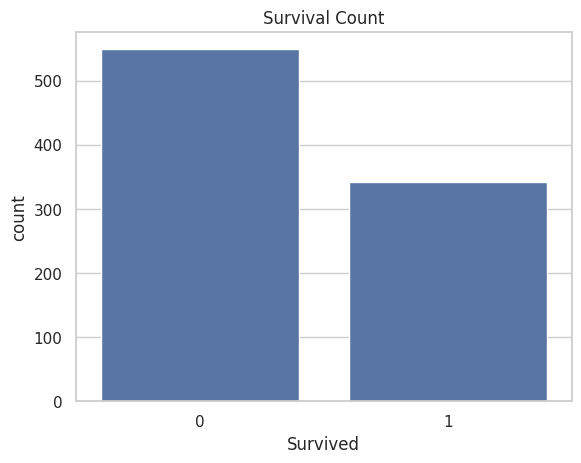

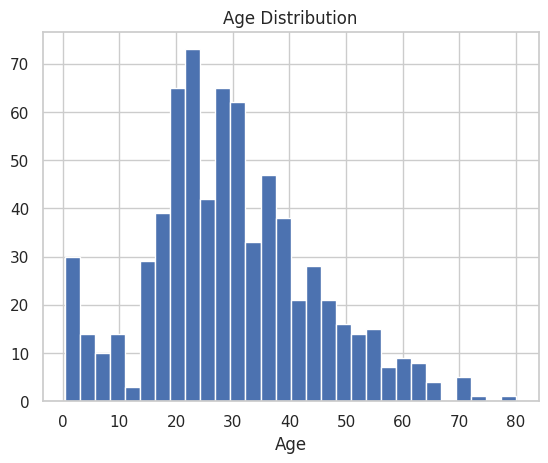

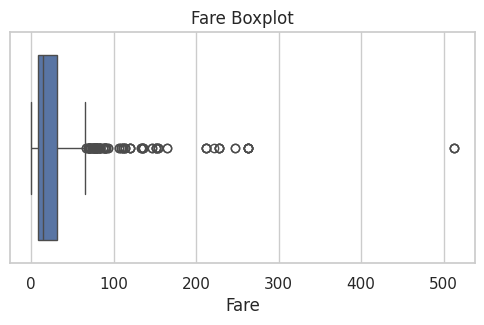

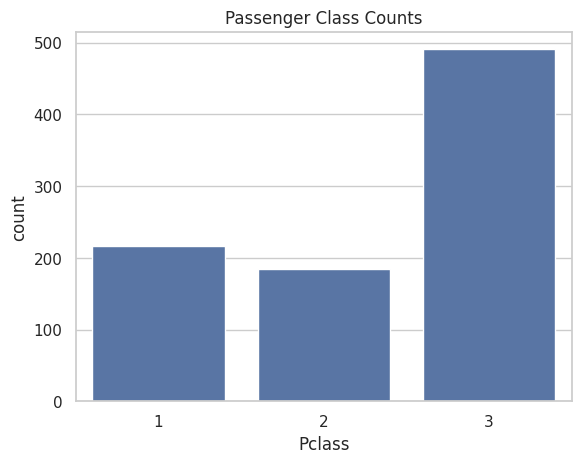

In [10]:
# Survival counts
plt.figure()
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

# Age distribution
plt.figure()
df['Age'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

# Fare boxplot
plt.figure(figsize=(6,3))
sns.boxplot(x='Fare', data=df)
plt.title('Fare Boxplot')
plt.show()

# Pclass counts
plt.figure()
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Counts')
plt.show()


Observation:

*   Plots the number of survivors vs non-survivors.
*   Useful for initial class distribution analysis.

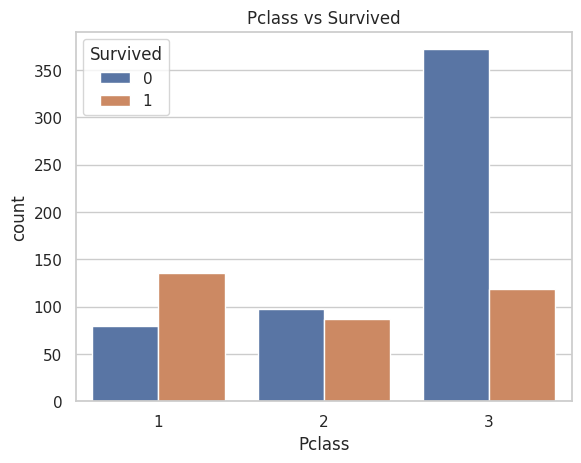

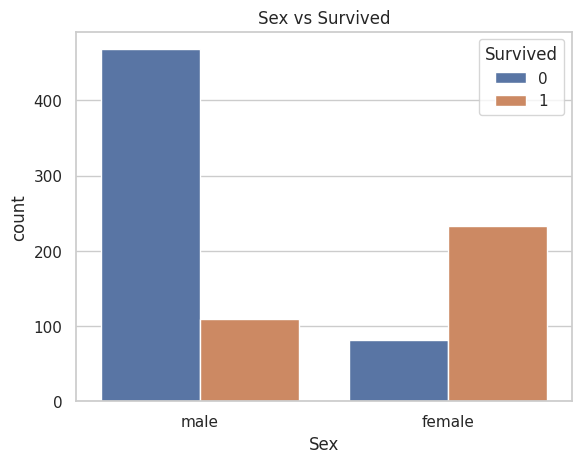

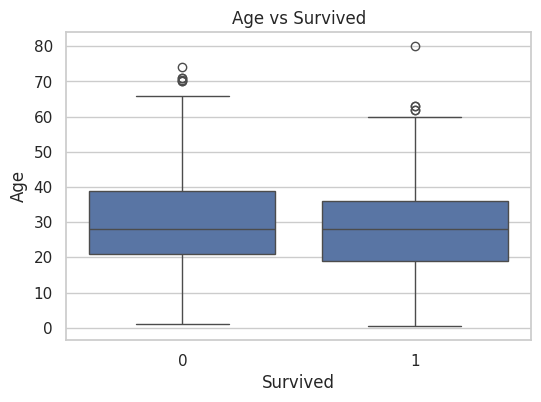

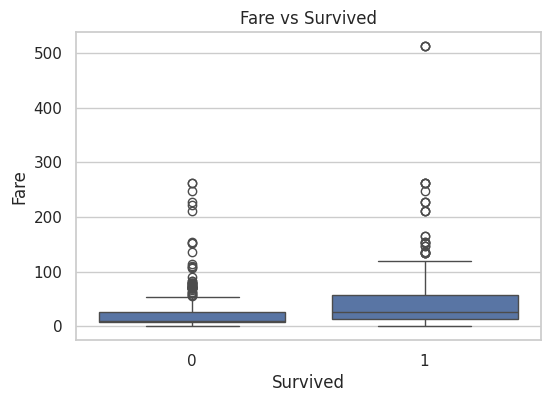

In [11]:
# Pclass vs Survived
plt.figure()
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Pclass vs Survived')
plt.show()

# Sex vs Survived
plt.figure()
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Sex vs Survived')
plt.show()

# Age distribution by Survived (boxplot)
plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survived')
plt.show()

# Fare by Survived
plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare vs Survived')
plt.show()


Observation:

*   Compares survival rates across passenger classes.
*   Shows if class affected survival chances.

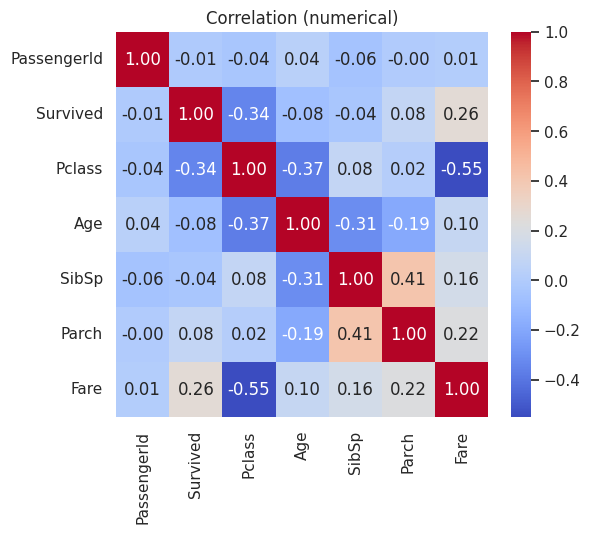

In [12]:
plt.figure(figsize=(6,5))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation (numerical)')
plt.show()


Observation:

*   Calculates numeric correlations between features.
*   Displays them as a heatmap for quick insights.



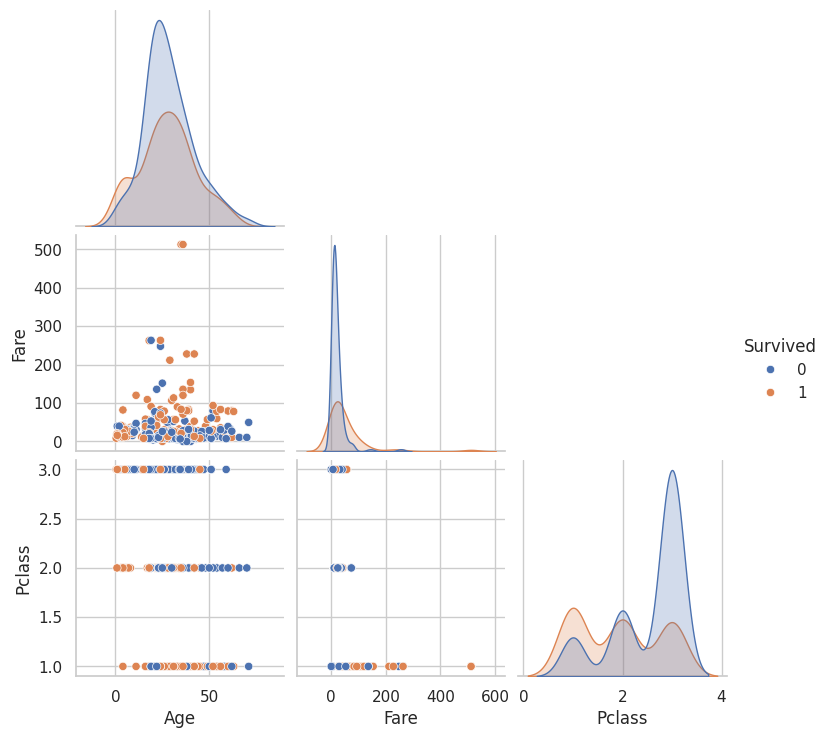

In [13]:
sample = df[['Survived','Age','Fare','Pclass']].dropna().sample(frac=0.5, random_state=42)
sns.pairplot(sample, hue='Survived', corner=True)
plt.show()

Observation:

*   Shows age distribution for survivors and non-survivors.
*   Helps detect survival trends by age group.



